

The central question of this research is: "How does humidity level impact electricity consumption?"

Null Hypothesis (H0): There is no significant difference in electricity consumption between periods of high humidity and periods of low or moderate humidity.

Alternative Hypothesis (H1): There is a significant difference in electricity consumption between periods of high humidity and periods of low or moderate humidity.


# Preperation

Here, we import necessary libraries and suppress future warnings for a cleaner output.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import warnings

# To silence deprecation warnings for seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

This part loads the dataset and displays the first few rows in a transposed format for easier viewing. The 'Humidity' and 'PowerConsumption_ZoneX fields will be the main focus of this research.

In [ ]:
file_path = 'https://drive.google.com/uc?export=download&id=1S44HggxPcfOwU4AZFJbf9r54CceI7I3B'
data = pd.read_csv(file_path)

data.head().T

,0,1,2,3,4
Datetime,2017-01-01 00:00:00,2017-01-01 00:10:00,2017-01-01 00:20:00,2017-01-01 00:30:00,2017-01-01 00:40:00
Temperature,6.559,6.414,6.313,6.121,5.921
Humidity,73.8,74.5,74.5,75.0,75.7
WindSpeed,0.083,0.083,0.08,0.083,0.081
GeneralDiffuseFlows,0.051,0.07,0.062,0.091,0.048
DiffuseFlows,0.119,0.085,0.1,0.096,0.085
PowerConsumption_Zone1,34055.6962,29814.68354,29128.10127,28228.86076,27335.6962
PowerConsumption_Zone2,16128.87538,19375.07599,19006.68693,18361.09422,17872.34043
PowerConsumption_Zone3,20240.96386,20131.08434,19668.43373,18899.27711,18442.40964


We check for missing values across all columns to ensure data integrity.

In [ ]:
missing_values = data.isnull().sum()

missing_values

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

#Descriptive Statistics

This code computes and prints descriptive statistics for the Humidity column.

In [ ]:
descriptive_stats_humidity = data['Humidity'].describe()

descriptive_stats_humidity

count    52416.000000
mean        68.259518
std         15.551177
min         11.340000
25%         58.310000
50%         69.860000
75%         81.400000
max         94.800000
Name: Humidity, dtype: float64

We categorize humidity levels and count the occurrences of each category.

In [ ]:
bins = [0, 33, 66, 100]
labels = ['Low', 'Moderate', 'High']
data['HumidityCategory'] = pd.cut(data['Humidity'], bins=bins, labels=labels, include_lowest=True)

humidity_category_counts = data['HumidityCategory'].value_counts()
humidity_category_counts

High        31010
Moderate    20103
Low          1303
Name: HumidityCategory, dtype: int64

We combine power consumption from all zones into a single column and display its descriptive statistics.

In [ ]:
data['TotalPowerConsumption'] = data[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].sum(axis=1)
descriptive_stats_total_power = data['TotalPowerConsumption'].describe()

descriptive_stats_total_power

count     52416.000000
mean      71222.885864
std       17143.138964
min       36785.039739
25%       56499.074640
50%       69788.790940
75%       83749.172310
max      134208.145950
Name: TotalPowerConsumption, dtype: float64

# Visualization

zWe create a scatter plot to visualize the

*   List item
*   List item

relationship between total power consumption and humidity categories.

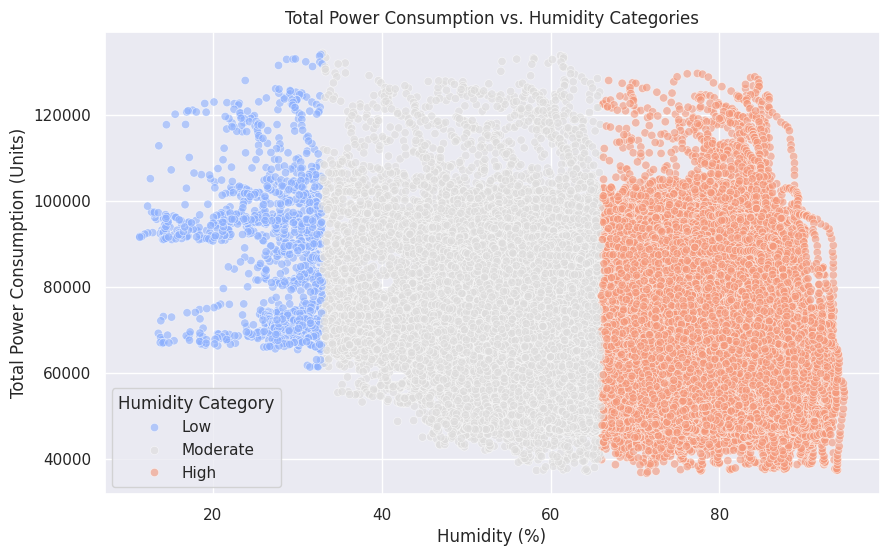

In [ ]:
sns.set(style="darkgrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Humidity', y='TotalPowerConsumption', hue='HumidityCategory', palette='coolwarm', alpha=0.6)

plt.title('Total Power Consumption vs. Humidity Categories')
plt.xlabel('Humidity (%)')
plt.ylabel('Total Power Consumption (Units)')
plt.legend(title='Humidity Category')

plt.show()

We use a box plot to compare the distribution of total power consumption across different humidity categories.

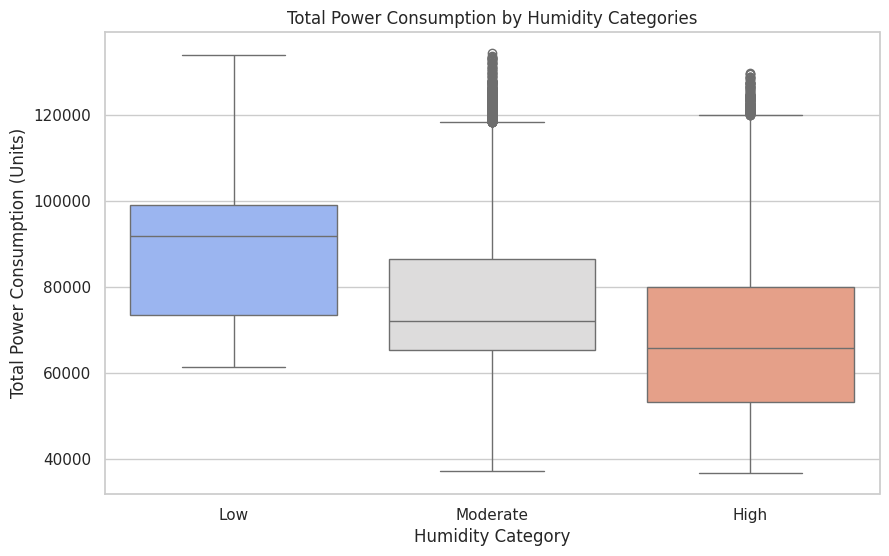

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='HumidityCategory', y='TotalPowerConsumption', palette='coolwarm')

plt.title('Total Power Consumption by Humidity Categories')
plt.xlabel('Humidity Category')
plt.ylabel('Total Power Consumption (Units)')

plt.show()


#Testing

The central question of this research is: "How does humidity level impact electricity consumption?"

**Null Hypothesis (H0):** There is no significant difference in electricity consumption between periods of high humidity and periods of low or moderate humidity.

**Alternative Hypothesis (H1):** There is a significant difference in electricity consumption between periods of high humidity and periods of low or moderate humidity.


We create a new binary column in the dataset, categorizing humidity levels as either 'LowModerate' or 'High'.

In [ ]:
data['HumidityBinary'] = data['HumidityCategory'].apply(lambda x: 'LowModerate' if x in ['Low', 'Moderate'] else 'High')


We separate the total power consumption data into two groups based on the binary humidity classification.

In [ ]:
low_moderate_data = data[data['HumidityBinary'] == 'LowModerate']['TotalPowerConsumption']
high_humidity_data = data[data['HumidityBinary'] == 'High']['TotalPowerConsumption']

This code performs a t-test between the two humidity groups to see if there's a statistically significant difference in power consumption.

In [ ]:
t_stat, p_value = ttest_ind(low_moderate_data, high_humidity_data, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 51.05112321122249
P-value: 0.0


#Conclusion

The T-statistic value of 51.0511 is significantly high, indicating a strong difference between the means of the two groups. The P-value is 0.0, suggesting that the difference in total power consumption between low/moderate and high humidity conditions is statistically significant, and we can reject the null hypothesis with high confidence. This result supports the alternative hypothesis that humidity levels have a significant impact on power consumption.

 Contrary to expectations that suggested a direct relationship where higher humidity would lead to increased energy consumption for cooling, the statistical evidence supports that higher humidity levels correlate with lower power consumption.